# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
pd.__version__

'1.0.1'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [3]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [4]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [5]:
cast = pd.read_csv('cast.csv')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [8]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [6]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [8]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [10]:
len(movies)

244914

### List all Batman movies ever made

In [11]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [12]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [13]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [22]:
df_HP=movies[movies.title.str.contains('Harry Potter')].sort_values('year')
df_HP

,title,year
223087,Harry Potter and the Sorcerer's Stone,2001
82791,Harry Potter and the Chamber of Secrets,2002
61957,Harry Potter and the Prisoner of Azkaban,2004
187926,Harry Potter and the Goblet of Fire,2005
50581,Harry Potter and the Order of the Phoenix,2007
109213,Harry Potter and the Half-Blood Prince,2009
152831,Harry Potter and the Deathly Hallows: Part 1,2010
143147,Harry Potter and the Deathly Hallows: Part 2,2011


### How many movies were made in the year 2017?

In [23]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [30]:
len(movies[movies.year==2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [43]:
movies[(movies.year>2000) & (movies.year<=2018)]

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014
...,...,...
244899,Poppy Goes to Hollywood,2016
244901,Thomson Villa,2014
244903,A Mero Hajur 2,2017
244906,Yin yang lu shi: Xuan yan zhou,2001


### Section I - Q4: How many movies are titled "Hamlet"?

In [45]:
df_hamlet=movies[movies.title=='Hamlet']

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [47]:
df_hamlet[df_hamlet.year>=2000].sort_values(by=['year'])

,title,year
55639,Hamlet,2000
1931,Hamlet,2009
227953,Hamlet,2011
178290,Hamlet,2014
186137,Hamlet,2015
191940,Hamlet,2016
244747,Hamlet,2017


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [53]:
cast[cast.title=='Inception'].n.isnull().sum()

27

### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [54]:
len(cast[cast.title=='Inception'])-cast[cast.title=='Inception'].n.isnull().sum()

51

### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [59]:
cast[cast.title=='Inception'].sort_values('n', ascending=False).iloc[:10]

,title,year,name,type,character,n
3731263,Inception,2010,Shannon Welles,actress,Old Mal,51.0
833376,Inception,2010,Jack Gilroy,actor,Old Cobb,50.0
2250605,Inception,2010,Jason Tendell,actor,Fischer's Driver,49.0
3473041,Inception,2010,Lisa (II) Reynolds,actress,Private Nurse,48.0
1812091,Inception,2010,Andrew Pleavin,actor,Businessman,47.0
2049179,Inception,2010,Felix Scott,actor,Businessman,46.0
807795,Inception,2010,Michael Gaston,actor,Immigration Officer,45.0
149008,Inception,2010,Peter Basham,actor,Fischer's Jet Captain,44.0
3444628,Inception,2010,Nicole Pulliam,actress,Lobby Sub Con,43.0
3203564,Inception,2010,Alex (II) Lombard,actress,Lobby Sub Con,42.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [60]:
cast[cast.character=='Albus Dumbledore'].title

704984                                    Epic Movie
792421           Harry Potter and the Goblet of Fire
792423     Harry Potter and the Order of the Phoenix
792424      Harry Potter and the Prisoner of Azkaban
947789       Harry Potter and the Chamber of Secrets
947790         Harry Potter and the Sorcerer's Stone
1685537                        Ultimate Hero Project
2248085                                       Potter
Name: title, dtype: object

In [61]:
cast[cast.character=='Albus Dumbledore'].name

704984            Dane Farwell
792421          Michael Gambon
792423          Michael Gambon
792424          Michael Gambon
947789          Richard Harris
947790          Richard Harris
1685537    George (X) O'Connor
2248085      Timothy Tedmanson
Name: name, dtype: object

### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [63]:
len(cast[cast.name=='Keanu Reeves'])

62

In [76]:
cast[(cast.name=='Keanu Reeves') & (cast.year >=1999) & (cast.n==1)].sort_values('year')

,title,year,name,type,character,n
1892390,The Matrix,1999,Keanu Reeves,actor,Neo,1.0
1892397,The Replacements,2000,Keanu Reeves,actor,Shane Falco,1.0
1892358,Hard Ball,2001,Keanu Reeves,actor,Conor O'Neill,1.0
1892383,Sweet November,2001,Keanu Reeves,actor,Nelson Moss,1.0
1892348,Constantine,2005,Keanu Reeves,actor,John Constantine,1.0
1892388,The Lake House,2006,Keanu Reeves,actor,Alex Wyler,1.0
1892382,Street Kings,2008,Keanu Reeves,actor,Detective Tom Ludlow,1.0
1892385,The Day the Earth Stood Still,2008,Keanu Reeves,actor,Klaatu,1.0
1892359,Henry's Crime,2010,Keanu Reeves,actor,Henry Torne,1.0
1892342,47 Ronin,2013,Keanu Reeves,actor,Kai,1.0


### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [77]:
len(cast[(cast.year>=1950) & (cast.year<=1960) & (cast.n.notnull())])

130208

In [78]:
len(cast[(cast.year>=2007) & (cast.year<=2017) & (cast.n.notnull())])

736363

### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [79]:
len(cast[(cast.year>=2000)& (cast.n==1)])

60568

In [80]:
len(cast[(cast.year>=2000) & (cast.n.notnull()) & (cast.n>1)])

1001710

In [81]:
len(cast[(cast.year>=2000) & (cast.n.isnull())])

887484

# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [82]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
The Outsider            12
Maya                    12
Temptation              12
Honeymoon               11
Othello                 11
The Three Musketeers    11
Freedom                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

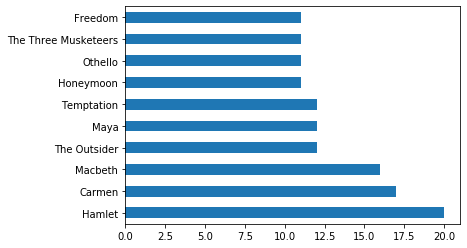

In [83]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [98]:
movies_2000s=movies[movies.year>=2000].groupby('year')
movies_2000s.count().sort_values('title', ascending=False).index.values[:3]

array([2017, 2016, 2015])

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

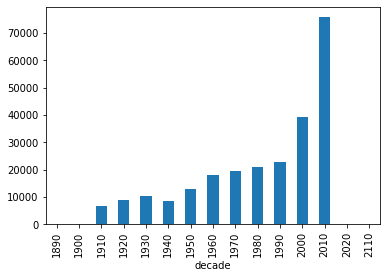

In [119]:
movies['decade']=movies.year//10*10
movies_decade=movies.groupby('decade')
movies_decade.count().iloc[:,1].plot(kind='bar')

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [124]:
cast.groupby('character').count().sort_values('title',ascending=False).index.values[:10]

array(['Himself', 'Dancer', 'Extra', 'Reporter', 'Student', 'Doctor',
       'Party Guest', 'Policeman', 'Nurse', 'Bartender'], dtype=object)

In [129]:
cast[cast.character=='Herself'].groupby('name').count().sort_values('title', ascending=False).index.values[:10]

array(['Queen Elizabeth II', 'Joyce Brothers', 'Luisa Horga',
       'Mar?a Luisa (V) Mart?n', 'Hillary Clinton', 'Margaret Thatcher',
       'In?s J. Southern', 'Marta Berrocal', 'Oprah Winfrey',
       'Marilyn Monroe'], dtype=object)

In [130]:
cast[cast.character=='Himself'].groupby('name').count().sort_values('title', ascending=False).index.values[:10]

array(['Adolf Hitler', 'Richard Nixon', 'Ronald Reagan',
       'John F. Kennedy', 'George W. Bush', 'Winston Churchill',
       'Martin Luther King', 'Bill Clinton', 'Ron Jeremy',
       'Franklin D. Roosevelt'], dtype=object)

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [135]:
cast[cast.character.str[:6]=='Zombie'].groupby('character').count().sort_values('title', ascending=False).index.values[:10]

array(['Zombie', 'Zombie Horde', 'Zombie - Protestor - Victim',
       'Zombie Extra', 'Zombie Dancer', 'Zombie Girl', 'Zombie #1',
       'Zombie #2', 'Zombie Vampire', 'Zombie Victim'], dtype=object)

In [136]:
cast[cast.character.str[:6]=='Police'].groupby('character').count().sort_values('title', ascending=False).index.values[:10]

array(['Policeman', 'Police Officer', 'Police Inspector',
       'Police Sergeant', 'Police officer', 'Police', 'Policewoman',
       'Police Chief', 'Police Captain', 'Police Commissioner'],
      dtype=object)

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

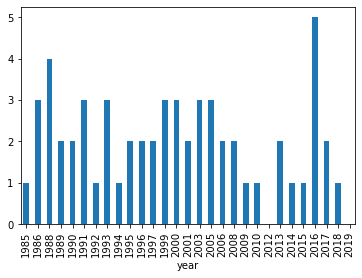

In [141]:
cast[cast.name=='Keanu Reeves'].groupby('year').count().n.plot(kind='bar')

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


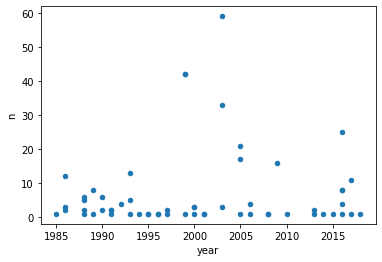

In [147]:
cast[cast.name=='Keanu Reeves'].plot(kind='scatter', x='year', y='n')

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

/opt/conda/envs/springboard/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


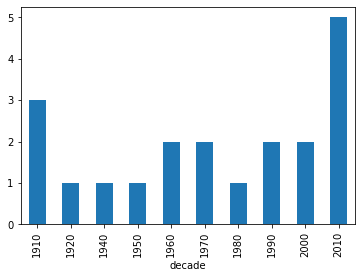

In [152]:
df_Hamlet=movies[movies.title=='Hamlet']
df_Hamlet['decade']=df_Hamlet.year//10*10
df_Hamlet.groupby('decade').count().title.plot(kind='bar') 

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [153]:
len(cast[(cast.n==1) & (cast.year>=1960) & (cast.year<1970) ])

11823

In [154]:
len(cast[(cast.n==1) & (cast.year>=2000) & (cast.year<2010) ])

26344

### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [167]:
df_FO=cast[cast.name=='Frank Oz'].groupby(['year','title']).count()
df_FO[df_FO.name>1].index.values

array([(1979, 'The Muppet Movie'),
       (1981, 'An American Werewolf in London'),
       (1981, 'The Great Muppet Caper'), (1982, 'The Dark Crystal'),
       (1984, 'The Muppets Take Manhattan'), (1985, 'Follow That Bird'),
       (1992, 'The Muppet Christmas Carol'),
       (1996, 'Muppet Treasure Island'), (1999, 'Muppets from Space'),
       (1999, 'The Adventures of Elmo in Grouchland')], dtype=object)

### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [172]:
df_FO=cast[cast.name=='Frank Oz'].groupby('character').count()
df_FO[df_FO.title>=2].index.values

array(['Animal', 'Bert', 'Cookie Monster', 'Fozzie Bear', 'Grover',
       'Miss Piggy', 'Sam the Eagle', 'Yoda'], dtype=object)

# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

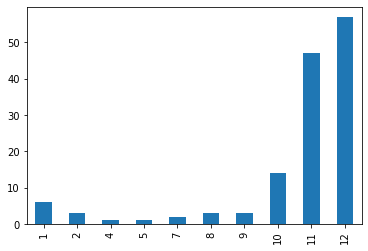

In [7]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

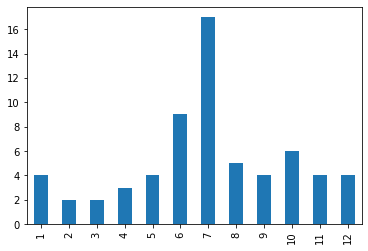

In [25]:
summer=release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country.str.contains('USA'))]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

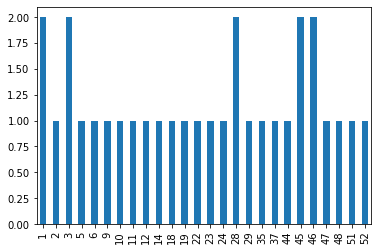

In [26]:
summer=release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country.str.contains('USA'))]
summer.date.dt.week.value_counts().sort_index().plot(kind='bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [45]:
df_kr=pd.merge(cast[(cast.name=='Keanu Reeves') & (cast.n==1)], release_dates[(release_dates.country=='USA')], how='inner', left_on=['title', 'year'], right_on=['title', 'year'])
df_kr.set_index(['year', 'date']).sort_index()


title          name   type  \
year date                                                                
1988 1988-04-15                  The Night Before  Keanu Reeves  actor   
1989 1989-02-17  Bill & Ted's Excellent Adventure  Keanu Reeves  actor   
1991 1991-07-19        Bill & Ted's Bogus Journey  Keanu Reeves  actor   
1993 1994-05-25                     Little Buddha  Keanu Reeves  actor   
1994 1994-06-10                             Speed  Keanu Reeves  actor   
1995 1995-05-26                   Johnny Mnemonic  Keanu Reeves  actor   
     1995-08-11              A Walk in the Clouds  Keanu Reeves  actor   
1996 1996-08-02                    Chain Reaction  Keanu Reeves  actor   
     1996-09-13                 Feeling Minnesota  Keanu Reeves  actor   
1997 1997-10-17              The Devil's Advocate  Keanu Reeves  actor   
1999 1999-03-31                        The Matrix  Keanu Reeves  actor   
2000 2000-08-11                  The Replacements  Keanu Reeves  actor   
2001 2001-02-16                    Sweet November  Keanu Reeves  actor   
     2001-09-14                         Hard Ball  Keanu Reeves  actor   
2005 2005-02-18                       Constantine  Keanu Reeves  actor   
2006 2006-06-16                    The Lake House  Keanu Reeves  actor   
2008 2008-04-11                      Street Kings  Keanu Reeves  actor   
     2008-12-12     The Day the Earth Stood Still  Keanu Reeves  actor   
2013 2013-12-25                          47 Ronin  Keanu Reeves  actor   
2014 2014-10-24                         John Wick  Keanu Reeves  actor   
2015 2015-10-09                       Knock Knock  Keanu Reeves  actor   
2017 2017-02-10              John Wick: Chapter 2  Keanu Reeves  actor   

                            character    n country  
year date                                           
1988 1988-04-15      Winston Connelly  1.0     USA  
1989 1989-02-17                   Ted  1.0     USA  
1991 1991-07-19                   Ted  1.0     USA  
1993 1994-05-25            Siddhartha  1.0     USA  
1994 1994-06-10           Jack Traven  1.0     USA  
1995 1995-05-26       Johnny Mnemonic  1.0     USA  
     1995-08-11           Paul Sutton  1.0     USA  
1996 1996-08-02      Eddie Kasalivich  1.0     USA  
     1996-09-13         Jjaks Clayton  1.0     USA  
1997 1997-10-17           Kevin Lomax  1.0     USA  
1999 1999-03-31                   Neo  1.0     USA  
2000 2000-08-11           Shane Falco  1.0     USA  
2001 2001-02-16           Nelson Moss  1.0     USA  
     2001-09-14         Conor O'Neill  1.0     USA  
2005 2005-02-18      John Constantine  1.0     USA  
2006 2006-06-16            Alex Wyler  1.0     USA  
2008 2008-04-11  Detective Tom Ludlow  1.0     USA  
     2008-12-12                Klaatu  1.0     USA  
2013 2013-12-25                   Kai  1.0     USA  
2014 2014-10-24             John Wick  1.0     USA  
2015 2015-10-09                  Evan  1.0     USA  
2017 2017-02-10             John Wick  1.0     USA

### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

([<matplotlib.axis.XTick at 0x7fa69c661110>,
 <a list of 10 Text xticklabel objects>)

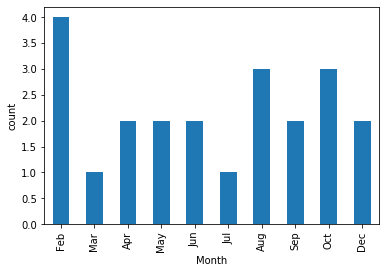

In [84]:
df_kr.date.dt.month.value_counts().sort_index().plot(kind='bar')
plt.ylabel('count')
plt.xlabel('Month')
plt.xticks(range(10),[ 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Dec'])

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

Text(0, 0.5, 'count')

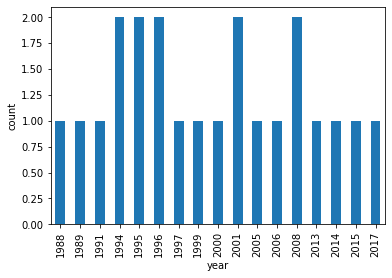

In [63]:
df_kr.date.dt.year.value_counts().sort_index().plot(kind='bar')
plt.xlabel('year')
plt.ylabel('count')